#  Quantitative Analyst Assessment
Welcome to the Quantitative Analyst Assessment. To help us get to know you better, please complete the following assessment to your best knowledge and independently. We structure the test to reflect the actual analysis and problems of the Quantitative Analyst role. The right blend of analytical skills, technical skills, capital market knowledge is crucial for this role. The questions cover the following topics:

- Capital Market
- Analytical Thinking
- Data Analysis
- Data Visualization

Although this assessment primarily intends to help us find a suitable candidate, the tools and packages used in the test are essential in modern quantitative portfolio management, data science, and machine learning. You will find similar applications outside of finance, such as [Kaggle](https://www.kaggle.com/), and it is beneficial for anyone who wants to start a career in data-related fields. We hope you get something out of this, no matter the results.

All the Python packages and tools are well-documented on the web. If you encounter something new, we will encourage you to do your research. Please do not share this confidential notebook; Purpose Investments reserves all copyrights.

For the recruiting purpose, we will contact suitable candidates only for the next step. Enjoy. Have fun!

# Instructions
1. Follow the **GitHub Classroom** invitation, clone or download this Jupyter Notebook (`Quantitative_Analyst_Assessment.ipynb`) to your local computer   
2. Complete the questions in this Jupyter Notebook using either **Google Colab** or your local Jupyter server.
3. Submit the completed notebook file via **Gitlab Classroom**

------------------------------------------
# Reference

## Run Jupyter Notebook online in Google Colab (Easiest):
*If you have never seen a Jupyter Notebook before, this is the easier way.*

[Google Colab](https://colab.research.google.com/) is an online Jupyter notebook service. Once you've clone this notebook in your local computer, upload it (`Quantitative_Analyst_Assessment.ipynb`) to *Google Colab* by following the prompts. 

When you completed the assessment, please download the file to your local computer and submit the file in [**GitHub Classroom**](https://classroom.github.com/a/KwGpf6Mm)

Here are some tutorials from Google to help you get started:
- [Sample Notebook from Google](https://colab.research.google.com/notebooks/welcome.ipynb#)
- [Get started with Google Colaboratory (Coding TensorFlow)](https://www.youtube.com/watch?v=inN8seMm7UI)


## Run Jupyter Notebook on your laptop locally:

Please see https://jupyter.org/


-----------------
# Beginning of the Assessment

In [3]:
# Install the necessary pacakges, if needed
!pip install pandas
!pip install sympy

In [4]:
# Initializing 
import pandas as pd
import numpy as np
import scipy.stats as si
import sympy as sy
#import pandas as pd # duplicated
import requests
import math

## Question 0 - a
Tell us about yourself

In [5]:
"""
name = 'John Snow'
#school = 'Castle Black'
#why_interested_in_one_line = "I want to become a Quant."
#email = 'info@purposeinvest.com'
#phone = '416-583-3850 '
"""

## Please find my answer below
name = 'Olivia Shao'
school = 'University of Toronto'
why_interested_in_one_line = "Always challenging but exciting."
email = 'oliviajunrushao@gmail.com'
phone = '416-827-0837 '

print(f'My name is {name}, from {school}. {why_interested_in_one_line}\n\nPlease contact me at {email}, {phone}')

My name is Olivia Shao, from University of Toronto. Always challenging but exciting.

Please contact me at oliviajunrushao@gmail.com, 416-827-0837 


## Question 0 - b
Will you be able to work full-time in our office in Toronto and provide proof of vaccination?

In [ ]:
"""
print('Yes/No')
"""

## Please find my answer below
print('Yes')

Yes


## Question 1 - Math/Finance

The Federal Reserve (Fed) will announce the federal funds rate decision tomorrow. The market expects the Fed will either keep the rate unchanged at 0.5% or cut to 0.25%. The federal funds rate equivalent treasury is trading at 0.32%. What is the implied probability `p` the Fed will cut the rate tomorrow?


In [ ]:
"""
p = 0.99 # Please write your calculation for p here
"""

## Please find my answer below
x = sy.Symbol('x')
eqn = sy.Eq(x*0.25/100+(1-x)*0.5/100, 0.32/100)
p = sy.solve(eqn)[0]

print(f'The implied probabily of the Fed cutting rate is: {p:.1%}')

The implied probabily of the Fed cutting rate is: 72.0%


## Question 2 - Programming
Given the pricing function `euro_vanilla_call` which compute the price of a European Vanilla Call option, please write the function `euro_vanilla_call_implied_vol` to compute the implied volatility to within 0.001 accuracy, using a numerical method.

Hint: please use `euro_vanilla_call` in `euro_vanilla_call_implied_vol`. **Don't** try to solve it analytically.

In [ ]:
## Do not change this cell
def euro_vanilla_call(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return call

sigma = 0.25
P = euro_vanilla_call(50, 60, 1, 0.05, sigma)
print(f'The price of the call option is {P:.3f}, given sigma = {sigma:.3f}')

The price of the call option is 2.513, given sigma = 0.250


Complete the function `euro_vanilla_call_implied_vol` in the following cell

In [ ]:
def euro_vanilla_call_implied_vol(S, K, T, r, P):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rater
    #P: market price of the option
    
    ##### Write your codes here ######
    #sigma_compute = 0

    ## Please find my answer below
    # To solve the equation numerically, I implement the Newton's method because Newton's method usually converges very quickly
    # Since Newton's method also requires computing values of the derivative of the function, I use forward difference method. 
    tol = 0.001
    epsilon = 0.00001
    num_iterations = 1
    sigma_compute = (P/S) * math.sqrt ( 2* math.pi / T) # for ATMF option, sigma is easily computed. Thus, it could be used as a initial guess

    diff = euro_vanilla_call(S,K,T,r,sigma_compute)- P

    while (abs(diff) > tol):            
      diff = euro_vanilla_call(S,K,T,r,sigma_compute)- P
      BS_prime = (euro_vanilla_call(S,K,T,r,sigma_compute+epsilon)-euro_vanilla_call(S,K,T,r,sigma_compute))/(epsilon) 
      sigma_compute = sigma_compute - diff/BS_prime # f(x) / f'(x)
      num_iterations+=1 
      print (f'Number of Iterations: {num_iterations}')
    return sigma_compute


sigma_compute = euro_vanilla_call_implied_vol(50, 60, 1, 0.05, P)

print(f'The computed sigma is {sigma_compute:.3f}, given oringal sigma = {sigma:.3f}')


Number of Iterations: 2
Number of Iterations: 3
Number of Iterations: 4
Number of Iterations: 5
The computed sigma is 0.250, given oringal sigma = 0.250


# Question 3 - Data Manipulation
At Purpose Investments, we have a public REST API for our fund data. The following example shows how to get the data for the Purpose Core Dividend Fund (symbol `PDF`) in Python. Please write the function `get_funds_latest_nav` to retrieve the lastest NAV of all the fund series, given a list of fund tickers

In [ ]:
# Example
import requests
fund_ticker = 'PDF'
PDF_data = requests.get(f'https://insights.purposelp.com/api/v2/funds/{fund_ticker}/').json()

In [ ]:
# lastest NAV of PDF series ETF
PDF_data['series']['ETF']['latest_nav']['value']

31.72951192

In [ ]:
def get_funds_latest_nav(fund_tickers):
    """
    fund_tickers: a list of purpose fund_tickers. e.g. ['PDF','PYF']
    output: list of dictionary
        [
        {'symbol':'PDF','series':'ETF','latest_nav':26.61137943},
        {'symbol':'PDF','series':'A','latest_nav':24.61137943},
        {'symbol':'PYF','series':'A','latest_nav':24.61137943},
        {'symbol':'PYF','series':'ETF','latest_nav':24.61137943}
        ]
        
    """
    ## Please find my answer below 
    result = []
    Data = requests.get(f'https://insights.purposelp.com/api/v2/funds/').json() # Import data
    # Loop over required fund tickers
    for fund in fund_tickers:
      temp_dict = Data[fund]
      num = len(temp_dict['series'])
      temp_series = list(temp_dict['series'])
      # Loop over all the series given a fund ticker
      for i in range(num):
        series_name = temp_series[i]
        nav = temp_dict['series'][series_name]['latest_nav']['value']
        result.append({'symbol':fund,'series':series_name,'latest_nav':nav})
    return result

## Test case
# fund_tickers = ['PDF','PYF']
# latest_nav = get_funds_latest_nav(fund_tickers)


{'symbol': 'PDF', 'series': 'A', 'latest_nav': 29.14341023}
{'symbol': 'PDF', 'series': 'D', 'latest_nav': 0.0}
{'symbol': 'PDF', 'series': 'F', 'latest_nav': 31.79569522}
{'symbol': 'PDF', 'series': 'I', 'latest_nav': 36.74147605}
{'symbol': 'PDF', 'series': 'P', 'latest_nav': 25.28462177}
{'symbol': 'PDF', 'series': 'XA', 'latest_nav': 22.66607906}
{'symbol': 'PDF', 'series': 'XF', 'latest_nav': 24.4804139}
{'symbol': 'PDF', 'series': 'ETF', 'latest_nav': 31.72951192}
{'symbol': 'PDF', 'series': 'XUA', 'latest_nav': 23.80790668}
{'symbol': 'PDF', 'series': 'XUF', 'latest_nav': 21.82351416}
{'symbol': 'PYF', 'series': 'A', 'latest_nav': 15.6278797}
{'symbol': 'PYF', 'series': 'F', 'latest_nav': 16.932049}
{'symbol': 'PYF', 'series': 'P', 'latest_nav': 17.8725414}
{'symbol': 'PYF', 'series': 'XA', 'latest_nav': 15.70400593}
{'symbol': 'PYF', 'series': 'XF', 'latest_nav': 16.76081197}
{'symbol': 'PYF', 'series': 'A B', 'latest_nav': 23.59246504}
{'symbol': 'PYF', 'series': 'ETF', 'lates

# Question 4 - Data Visualization
The following is the backtested equity curve of an option strategy. The data is in `df_plot`. Please reproduce the graph as close as possible with your choice of plotting library. We used `matplotlib` to generate the original graph.

![title](https://purpose-insights-public-statics.s3.amazonaws.com/data/df_plot.PNG)

In [ ]:
# Download data and show the top 5 rows
df_plot = pd.read_csv('https://purpose-insights-public-statics.s3.amazonaws.com/data/df_plot.csv').set_index('date')
df_plot.head()

,portfolio,underlying,action
date,,,
2011-01-03,100.676864,100.000000,new_contract
2011-01-04,105.513118,100.945903,NaN
2011-01-05,105.475600,101.454325,NaN
2011-01-06,105.584545,101.267927,NaN
2011-01-07,105.596710,101.085006,NaN


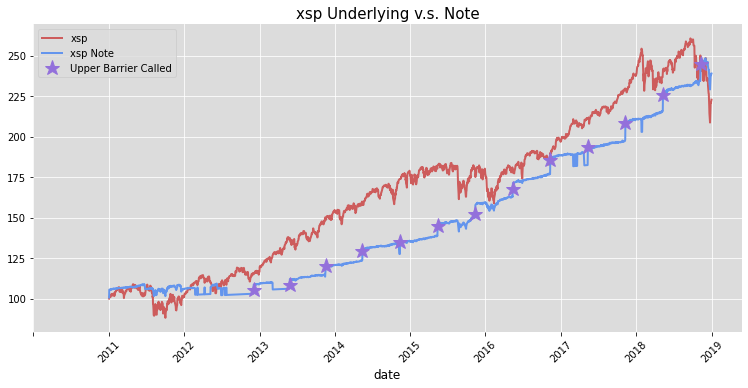

In [9]:
# Write the plotting codes here please
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import matplotlib as mpl
import matplotlib.colors as mcolors


df = pd.read_csv('https://purpose-insights-public-statics.s3.amazonaws.com/data/df_plot.csv')
price_date = pd.to_datetime(df['date'])
xsp_Note = df['portfolio']
xsp = df['underlying']
xsp_Note_call = df.loc[df.action=='up_call']
xsp_Note_call_date = pd.to_datetime(xsp_Note_call['date'])
xsp_Note_call_price =xsp_Note_call['portfolio']

# tick the x-axis
plt.rcParams["figure.figsize"] = (10.5,5.5)
years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')  # add some space for the year label
dts = price_date.dt.to_pydatetime()
fig = plt.figure(); ax = fig.add_subplot(111)

ax.plot(dts,xsp,color='#CD5C5C',linewidth=2)
ax.plot(dts, xsp_Note,color='#6495ED',linewidth=2) 
ax.plot(xsp_Note_call_date, xsp_Note_call_price,"*",mec = '#9370DB', mfc = '#9370DB',markersize=15.5) 

# tick the x-axis
plt.xticks(plt.xticks()[0],  rotation=45)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# remove the first x-lable
x_ticks = ax.xaxis.get_major_ticks()
x_ticks[0].label1.set_visible(False)

# format backgroud
plt.grid(linestyle='-')
mpl.rcParams['grid.color'] = 'white'
ax.set_facecolor('#DCDCDC')

# Add title and axis names
plt.title("xsp Underlying v.s. Note",fontsize=15)
plt.xlabel('date',fontsize=12)

# remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# add lengent
plt.gca().legend(('xsp','xsp Note','Upper Barrier Called'),loc='upper left',facecolor='#DCDCDC')
plt.tight_layout()
plt.show()





# Question 5 - Quantitative Investing
The Factor is a significant concept in quantitative investing. A factor usually represents a common attribute among different stocks. For example, both Apple and Microsoft are in the technology sector. Then, one might find that Technology is a factor. Here are some further readings:

- [Fama and French Factor Model](https://www.investopedia.com/terms/f/famaandfrenchthreefactormodel.asp)
- [Factor Investing](https://www.investopedia.com/terms/f/factor-investing.asp)

**Value** and **Momentum** are two of the most prevalent factors with plenty of research and application. For the S&P 500 index, you are given the historical prices (dataframe `prices`) and fundamental data (dataframe `fundamentals`) of all the index members. Please programmatically create a strategy to pick 50 stocks within the index, which rebalance quarterly, utilizing the **Value** and **Momentum** factors. Please also provide a brief explanation and put the output in `df_value` and `df_momentum` respectively. Any backtest or statistics that show to justify your strategy is better than the S&P500 will be a plus.

You will need [pandas](https://pandas.pydata.org/) to complete this question.

Please note that this is an open-ended question and an important topic we continue to research on.

In [124]:
# Download the data
prices = pd.read_csv('https://purpose-insights-public-statics.s3.amazonaws.com/data/prices.csv').set_index('date')
fundamentals = pd.read_csv('https://purpose-insights-public-statics.s3.amazonaws.com/data/fundamentals.csv').set_index('ticker')

In [125]:
# The last 5 rows of the dataframe
fundamentals.tail()

,AVG_DAILY_VALUE_TRADED_6M,BEST_DIV_YLD,BEST_PE_RATIO,CNTRY_OF_RISK,COUNTRY,COUNTRY_FULL_NAME,CRNCY,CUR_MKT_CAP,EV_EBITA_ADJUSTED,GICS_SECTOR_NAME,...,LONG_COMP_NAME,MOV_AVG_100D,MOV_AVG_50D,NUMBER_OF_WOMEN_ON_BOARD,PCT_WOMEN_ON_BOARD,PX_TO_BOOK_RATIO,PX_TO_FREE_CASH_FLOW,SALES_5YR_AVG_GR,SALES_GROWTH,CRNCY_TICKER
ticker,,,,,,,,,,,,,,,,,,,,,
XYL UN Equity,18552936.0,NaN,24.384707,US,US,UNITED STATES,USD,1.468973e+10,16.335179,Industrials,...,Xylem Inc/NY,79.624702,79.684196,2.0,20.000000,5.252874,40.652859,7.060127,10.622477,USD Curncy
YUM UN Equity,44528340.0,1.518486,29.195580,US,US,UNITED STATES,USD,3.475877e+10,21.428785,Consumer Discretionary,...,Yum! Brands Inc,104.229401,108.015404,3.0,27.272699,NaN,34.040405,-12.458436,-3.232392,USD Curncy
ZBH UN Equity,32847866.0,0.784860,16.400099,US,US,UNITED STATES,USD,2.721564e+10,13.342171,Health Care,...,Zimmer Biomet Holdings Inc,121.615700,118.630402,3.0,27.272699,2.333663,28.626089,13.436156,1.660836,USD Curncy
ZION UW Equity,39030464.0,3.168094,10.280287,US,US,UNITED STATES,USD,7.852375e+09,NaN,Financials,...,Zions Bancorp NA,46.324100,44.806599,2.0,18.181801,1.116504,11.660300,8.545248,10.855263,USD Curncy
ZTS UN Equity,57066312.0,0.575816,32.711187,US,US,UNITED STATES,USD,5.486357e+10,21.279759,Health Care,...,Zoetis Inc,104.998199,110.164597,2.0,18.181801,23.697005,38.254128,5.864108,9.760693,USD Curncy


In [126]:
# The last 5 rows of the dataframe
prices.tail()

,A UN Equity,AAL UW Equity,AAP UN Equity,AAPL UW Equity,ABBV UN Equity,ABC UN Equity,ABMD UW Equity,ABT UN Equity,ACN UN Equity,ADBE UW Equity,...,XEL UW Equity,XLNX UW Equity,XOM UN Equity,XRAY UW Equity,XRX UN Equity,XYL UN Equity,YUM UN Equity,ZBH UN Equity,ZION UW Equity,ZTS UN Equity
date,,,,,,,,,,,,,,,,,,,,,
2019-07-19,73.9316,34.7374,164.866,253.4083,88.6653,101.9727,260.47,218.8072,252.4652,331.5422,...,63.6902,169.4363,422.4904,66.9647,120.4010,90.4533,148.0413,131.9867,98.3103,119.7726
2019-07-22,74.3513,34.5484,166.935,259.1997,87.9668,101.4123,263.97,220.2577,253.1291,333.3573,...,63.6273,171.5491,422.9411,66.4448,119.4881,89.8493,149.0280,131.3025,96.4550,121.7147
2019-07-23,75.2122,35.4200,165.612,261.2261,87.6175,102.3185,264.67,221.9333,253.1552,332.6334,...,63.3129,175.7608,424.6313,66.7757,121.9108,91.4711,148.5544,133.4621,91.3369,121.7147
2019-07-24,74.8786,36.3231,166.515,261.0134,87.2682,103.6063,275.94,221.5582,253.1682,335.2156,...,63.3653,182.4720,424.5749,66.8820,123.2100,92.0975,148.2123,134.5313,92.7870,121.1898
2019-07-25,75.1692,33.2568,157.617,258.9495,86.2333,102.4616,272.21,220.0826,253.8191,333.5517,...,63.0823,176.1889,422.1523,65.9958,121.2788,91.3481,148.5149,132.4785,94.3651,120.3604


In [ ]:
# Answer is provided in a separate file